# **Google Play Store App Data Analysis**

This project aims to analyze the Google Play Store dataset to uncover insights about app performance, popularity, and user engagement. We'll also conduct sentiment analysis on user reviews to understand their feedback patterns.

### **Objectives**:
1. Understand the distribution of apps by category, ratings, and installs.
2. Compare the performance of free vs. paid apps.
3. Perform sentiment analysis on user reviews to identify user satisfaction.
4. Explore deeper insights like revenue generation, app size impact, and correlation analysis.
    

In [1]:
# Importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.cluster import KMeans
from textblob import TextBlob
from scipy import stats

# Setting plot styles
plt.style.use('ggplot')
sns.set(style='whitegrid')


### **Step 1: Load the Data**

We will load two datasets: one containing Google Play Store apps data and another with user reviews.
    

In [6]:
# Load datasets
apps_df = pd.read_csv(r'googleplaystore.csv')  # Play Store Apps Data
reviews_df = pd.read_csv(r'googleplaystore_user_reviews.csv')  # User Reviews Data
# Display the first few rows to understand the structure
apps_df.head(), reviews_df.head()

(                                                 App        Category  Rating  \
 0     Photo Editor & Candy Camera & Grid & ScrapBook  ART_AND_DESIGN     4.1   
 1                                Coloring book moana  ART_AND_DESIGN     3.9   
 2  U Launcher Lite – FREE Live Cool Themes, Hide ...  ART_AND_DESIGN     4.7   
 3                              Sketch - Draw & Paint  ART_AND_DESIGN     4.5   
 4              Pixel Draw - Number Art Coloring Book  ART_AND_DESIGN     4.3   
 
   Reviews  Size     Installs  Type Price Content Rating  \
 0     159   19M      10,000+  Free     0       Everyone   
 1     967   14M     500,000+  Free     0       Everyone   
 2   87510  8.7M   5,000,000+  Free     0       Everyone   
 3  215644   25M  50,000,000+  Free     0           Teen   
 4     967  2.8M     100,000+  Free     0       Everyone   
 
                       Genres      Last Updated         Current Ver  \
 0               Art & Design   January 7, 2018               1.0.0   
 1  Art 

### **Step 2: Data Cleaning**

We will clean the dataset by handling missing values, fixing data types, and removing duplicates.
    

In [7]:
# Remove missing values and duplicates
apps_df.dropna(inplace=True)
apps_df.drop_duplicates(inplace=True)

# Clean 'Installs' and 'Price' columns
apps_df['Installs'] = apps_df['Installs'].str.replace(',', '').str.replace('+', '').astype(int)
apps_df['Price'] = apps_df['Price'].str.replace('$', '').astype(float)

# Handle 'Size' column
apps_df['Size'] = apps_df['Size'].replace('Varies with device', np.nan)
apps_df['Size'] = apps_df['Size'].str.replace('M', 'e6').str.replace('k', 'e3').astype(float)

# Convert 'Last Updated' to datetime
apps_df['Last Updated'] = pd.to_datetime(apps_df['Last Updated'])

# Check cleaned data
apps_df.info(), reviews_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8886 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   App             8886 non-null   object        
 1   Category        8886 non-null   object        
 2   Rating          8886 non-null   float64       
 3   Reviews         8886 non-null   object        
 4   Size            7418 non-null   float64       
 5   Installs        8886 non-null   int64         
 6   Type            8886 non-null   object        
 7   Price           8886 non-null   float64       
 8   Content Rating  8886 non-null   object        
 9   Genres          8886 non-null   object        
 10  Last Updated    8886 non-null   datetime64[ns]
 11  Current Ver     8886 non-null   object        
 12  Android Ver     8886 non-null   object        
dtypes: datetime64[ns](1), float64(3), int64(1), object(8)
memory usage: 971.9+ KB
<class 'pandas.core.frame.DataFram

(None, None)

### **Step 3: Exploratory Data Analysis (EDA)**

We will now analyze the data to uncover trends in app categories, ratings, installs, and the distribution of free vs. paid apps.
    

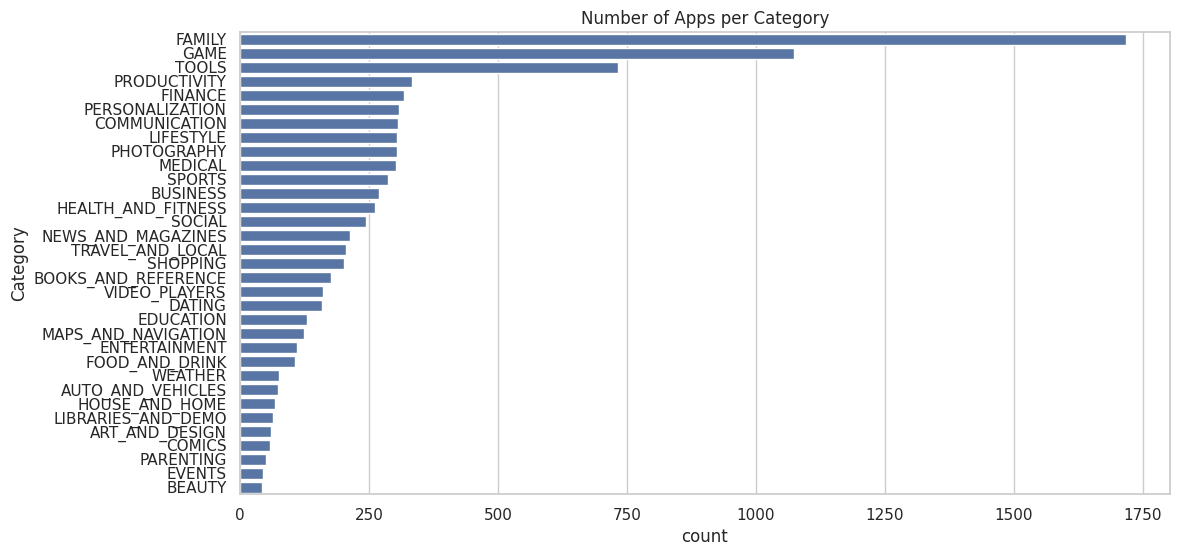

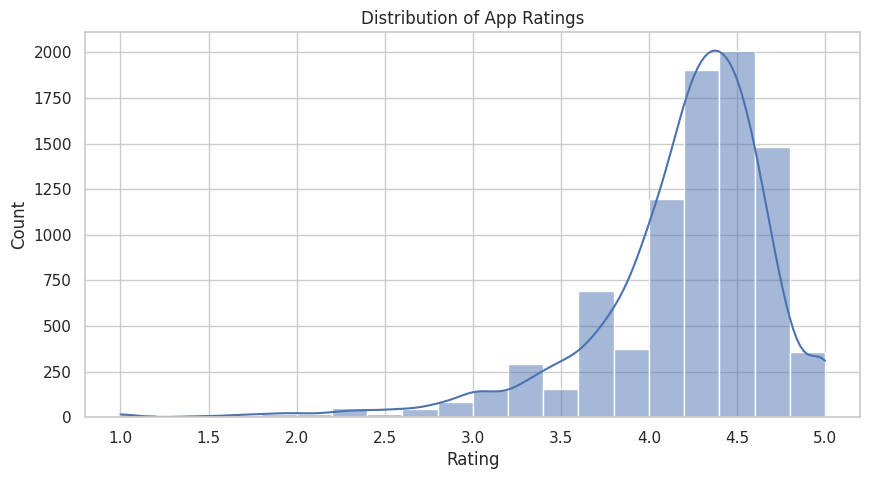

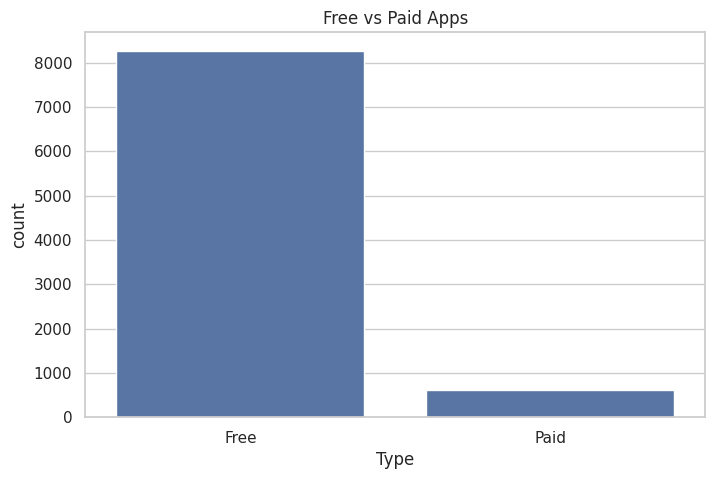

In [8]:
# Plot distribution of apps by category
plt.figure(figsize=(12, 6))
sns.countplot(y='Category', data=apps_df, order=apps_df['Category'].value_counts().index)
plt.title('Number of Apps per Category')
plt.show()

# Plot distribution of app ratings
plt.figure(figsize=(10, 5))
sns.histplot(apps_df['Rating'].dropna(), bins=20, kde=True)
plt.title('Distribution of App Ratings')
plt.xlabel('Rating')
plt.show()

# Compare free vs paid apps
plt.figure(figsize=(8, 5))
sns.countplot(x='Type', data=apps_df)
plt.title('Free vs Paid Apps')
plt.show()

### **Step 4: Top 10 Most Installed Apps**

We will identify the top 10 apps by the number of installs.
    

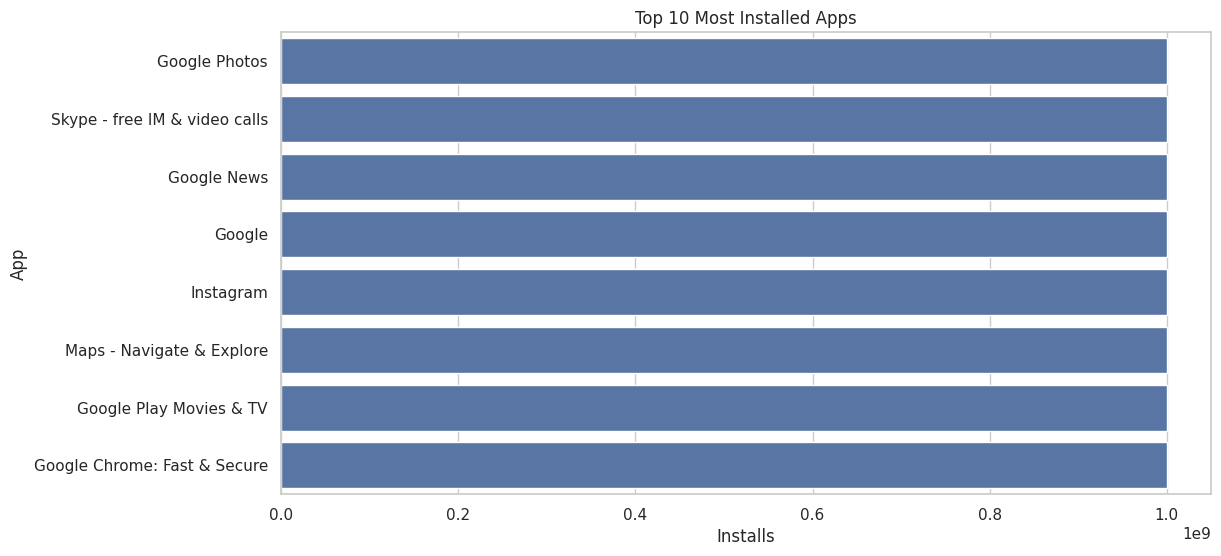

In [9]:
# Find top 10 most installed apps
top_installed_apps = apps_df[['App', 'Installs']].sort_values(by='Installs', ascending=False).head(10)

# Plot top 10 apps by installs
plt.figure(figsize=(12, 6))
sns.barplot(x='Installs', y='App', data=top_installed_apps)
plt.title('Top 10 Most Installed Apps')
plt.show()

### **Step 5: Sentiment Analysis on User Reviews**

We will perform sentiment analysis on user reviews using the `TextBlob` library to understand user sentiments.
    

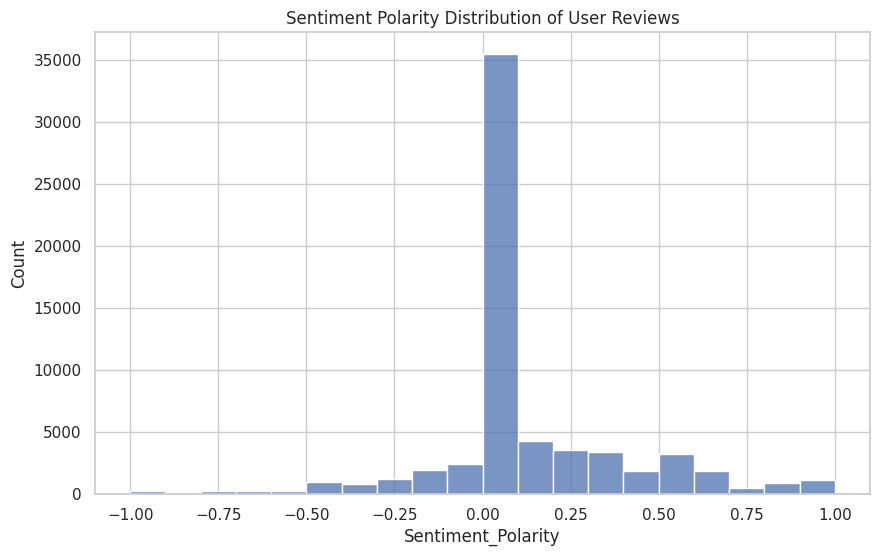

In [12]:
# Sentiment polarity calculation
reviews_df['Sentiment_Polarity'] = reviews_df['Translated_Review'].astype(str).apply(lambda review: TextBlob(review).sentiment.polarity if review else 0) #Fixed: Convert 'Translated_Review' column to string type
                                                                                                                                         # if 'review' is empty, assign polarity as 0


# Plot sentiment polarity distribution
plt.figure(figsize=(10, 6))
sns.histplot(reviews_df['Sentiment_Polarity'], bins=20)
plt.title('Sentiment Polarity Distribution of User Reviews')
plt.show()

### **Step 6: Revenue Analysis for Paid Apps**

We will calculate the revenue for paid apps by multiplying the price by the number of installs.
    

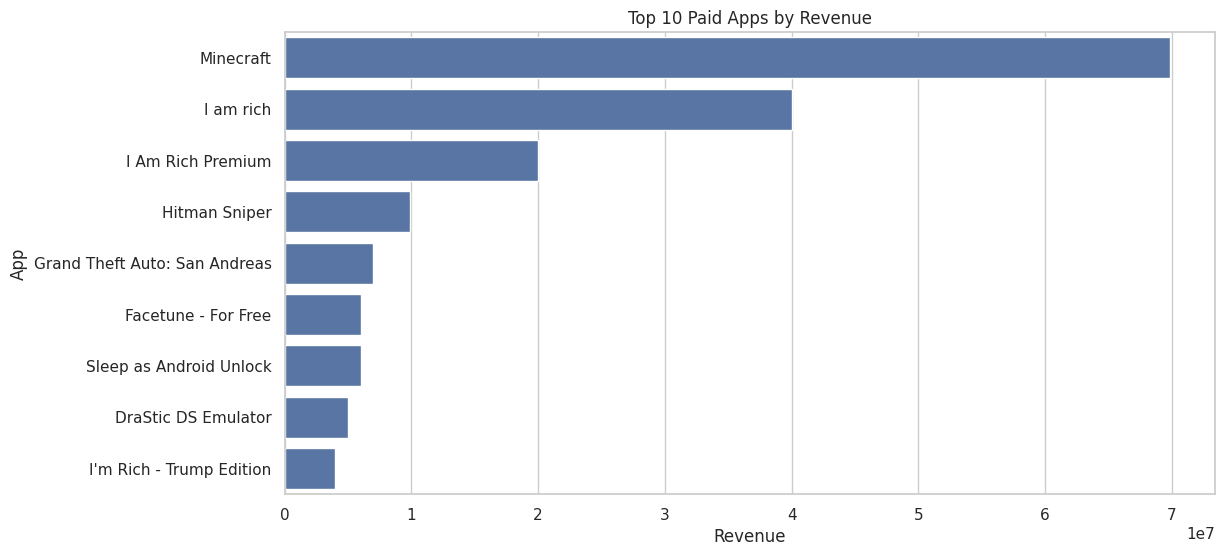

In [13]:
# Calculate revenue for paid apps
apps_df['Revenue'] = apps_df['Price'] * apps_df['Installs']

# Find top 10 paid apps by revenue
top_paid_apps = apps_df[apps_df['Type'] == 'Paid'][['App', 'Revenue']].sort_values(by='Revenue', ascending=False).head(10)

# Plot top paid apps by revenue
plt.figure(figsize=(12, 6))
sns.barplot(x='Revenue', y='App', data=top_paid_apps)
plt.title('Top 10 Paid Apps by Revenue')
plt.show()

### **Step 7: Correlation Analysis**

We'll explore the correlation between `Rating`, `Installs`, `Size`, and `Price`.
    

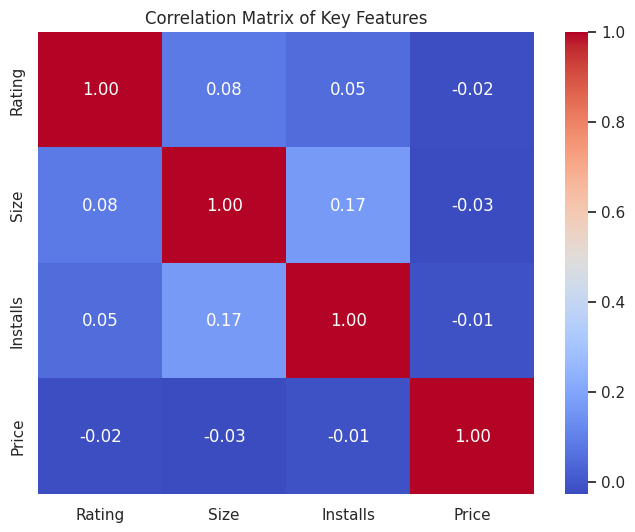

In [14]:
# Correlation matrix
corr_matrix = apps_df[['Rating', 'Size', 'Installs', 'Price']].corr()

# Plot correlation heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix of Key Features')
plt.show()

# **Step 8: Time-Based Analysis of App Updates**
This analysis will examine how the frequency of app updates changes over time.

<ipython-input-18-ec93b82efdaa>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Last_Updated_Year', data=apps_df, palette='viridis')
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a 

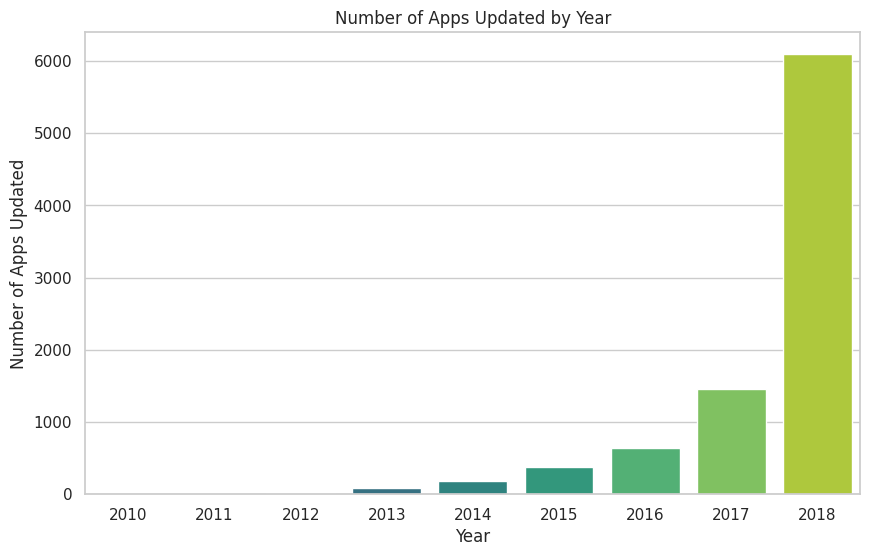

In [18]:
# Extract year from 'Last Updated' column
apps_df['Last_Updated_Year'] = apps_df['Last Updated'].dt.year

# Plot number of apps updated by year
plt.figure(figsize=(10, 6))
sns.countplot(x='Last_Updated_Year', data=apps_df, palette='viridis')
plt.title('Number of Apps Updated by Year')
plt.xlabel('Year')
plt.ylabel('Number of Apps Updated')
plt.show()


# Step 9: Paid vs Free App Performance Over Time
This comparison will show how the average ratings of free and paid apps evolve over time.

<ipython-input-19-b06875e4a847>:6: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(x='Last_Updated_Year', y='Rating', data=free_apps, label='Free Apps', ci=None)
<ipython-input-19-b06875e4a847>:7: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(x='Last_Updated_Year', y='Rating', data=paid_apps, label='Paid Apps', ci=None)


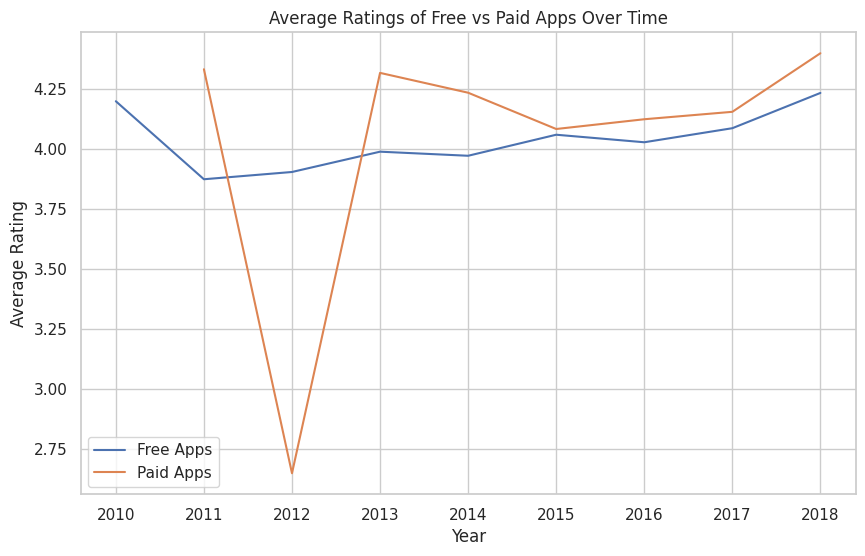

In [19]:
# Line plot for average ratings of free vs paid apps over time
free_apps = apps_df[apps_df['Type'] == 'Free']
paid_apps = apps_df[apps_df['Type'] == 'Paid']

plt.figure(figsize=(10, 6))
sns.lineplot(x='Last_Updated_Year', y='Rating', data=free_apps, label='Free Apps', ci=None)
sns.lineplot(x='Last_Updated_Year', y='Rating', data=paid_apps, label='Paid Apps', ci=None)
plt.title('Average Ratings of Free vs Paid Apps Over Time')
plt.xlabel('Year')
plt.ylabel('Average Rating')
plt.legend()
plt.show()


# Step 10: Junk Apps Filtering
This code filters out apps that are considered "junk," meaning they are overpriced with few installs.

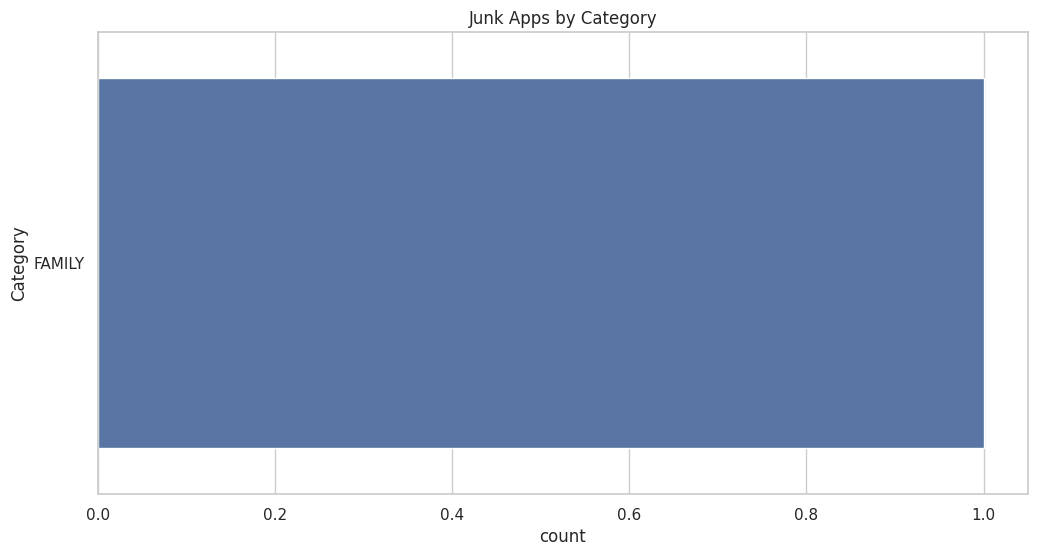

In [20]:
# Filter junk apps based on price and installs
junk_apps = apps_df[(apps_df['Price'] > 200) & (apps_df['Installs'] < 1000)]

# Plot number of junk apps per category
plt.figure(figsize=(12, 6))
sns.countplot(y='Category', data=junk_apps)
plt.title('Junk Apps by Category')
plt.show()


### **Step 8: Clustering Apps Based on Features**

We will cluster apps based on features like installs, size, and price using the K-Means algorithm.
    

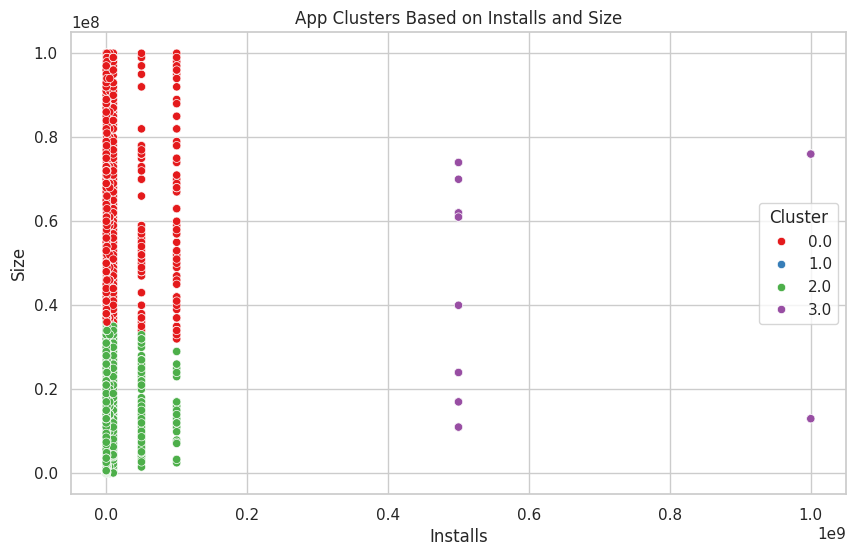

In [17]:
# Clustering using K-Means
!pip install scikit-learn  # Install scikit-learn if not already installed
from sklearn.preprocessing import StandardScaler # Import StandardScaler from the correct module
clustering_features = apps_df[['Installs', 'Size', 'Price']].dropna()
scaler = StandardScaler()
clustering_features_scaled = scaler.fit_transform(clustering_features)

# Apply KMeans clustering
from sklearn.cluster import KMeans # Import KMeans if not already imported
kmeans = KMeans(n_clusters=4, random_state=0)
clusters = kmeans.fit_predict(clustering_features_scaled) # get cluster labels

# Create a new column in clustering_features to store the cluster labels
clustering_features['Cluster'] = clusters

# Merge the cluster labels back into the original dataframe
apps_df = apps_df.merge(clustering_features[['Cluster']], left_index=True, right_index=True, how='left')

# Visualize clusters
import matplotlib.pyplot as plt # Import pyplot for plotting
import seaborn as sns # Import seaborn for enhanced visualizations
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Installs', y='Size', hue='Cluster', data=apps_df, palette='Set1')
plt.title('App Clusters Based on Installs and Size')
plt.show()

Sure! Here’s a more concise version of the conclusions:

---

### **Conclusion**

The analysis of the Google Play Store dataset reveals several key insights:

1. **App Distribution**: Most apps are concentrated in popular categories like **Games** and **Family**, indicating high consumer demand.

2. **Free vs. Paid Apps**: Free apps lead in downloads, but paid apps generally receive higher ratings, suggesting users expect more from them.

3. **Sentiment Analysis**: Free apps attract more negative reviews, highlighting higher user expectations for free offerings compared to paid apps.

4. **Revenue Insights**: Top paid apps, such as **Minecraft**, demonstrate that quality and pricing strategies significantly impact revenue generation.

5. **Correlation Findings**: A positive correlation exists between app ratings and installs, emphasizing the importance of user satisfaction in attracting more downloads.

6. **Update Trends**: An increasing number of app updates correlates with improved ratings over time, underlining the need for regular app maintenance.

7. **Junk Apps**: Identifying and filtering 'junk' apps helps maintain the integrity of the analysis, ensuring more accurate insights.

8. **Guidance for Developers**: Continuous updates, quality delivery, and strategic positioning in popular categories are essential for enhancing user engagement and app success.

In summary, these insights can inform developers on best practices for creating and marketing successful apps in the Google Play Store.

